<a href="https://colab.research.google.com/github/lailaknisa/lailaknisa.github.io/blob/main/Final_Project_Kelompok_5_FIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA UNDERSTANDING**

In [ ]:
# Import Library yang akan digunakan

# Untuk olah data
import pandas as pd
import numpy as np

# Untuk Visualisasi
import seaborn as sns

# Untuk Visualisasi
from matplotlib import pyplot as plt

import warnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Upload file train dataset CSV
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/application_train.csv')
bureau = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bureau.csv')

# **DATASET TRAIN**

In [ ]:
# Show the first 5 rows
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train.shape

# terdapar 307511 entries data dan 122 column

(307511, 122)

In [ ]:
print(train.columns.values)

['SK_ID_CURR' 'TARGET' 'NAME_CONTRACT_TYPE' 'CODE_GENDER' 'FLAG_OWN_CAR'
 'FLAG_OWN_REALTY' 'CNT_CHILDREN' 'AMT_INCOME_TOTAL' 'AMT_CREDIT'
 'AMT_ANNUITY' 'AMT_GOODS_PRICE' 'NAME_TYPE_SUITE' 'NAME_INCOME_TYPE'
 'NAME_EDUCATION_TYPE' 'NAME_FAMILY_STATUS' 'NAME_HOUSING_TYPE'
 'REGION_POPULATION_RELATIVE' 'DAYS_BIRTH' 'DAYS_EMPLOYED'
 'DAYS_REGISTRATION' 'DAYS_ID_PUBLISH' 'OWN_CAR_AGE' 'FLAG_MOBIL'
 'FLAG_EMP_PHONE' 'FLAG_WORK_PHONE' 'FLAG_CONT_MOBILE' 'FLAG_PHONE'
 'FLAG_EMAIL' 'OCCUPATION_TYPE' 'CNT_FAM_MEMBERS' 'REGION_RATING_CLIENT'
 'REGION_RATING_CLIENT_W_CITY' 'WEEKDAY_APPR_PROCESS_START'
 'HOUR_APPR_PROCESS_START' 'REG_REGION_NOT_LIVE_REGION'
 'REG_REGION_NOT_WORK_REGION' 'LIVE_REGION_NOT_WORK_REGION'
 'REG_CITY_NOT_LIVE_CITY' 'REG_CITY_NOT_WORK_CITY'
 'LIVE_CITY_NOT_WORK_CITY' 'ORGANIZATION_TYPE' 'EXT_SOURCE_1'
 'EXT_SOURCE_2' 'EXT_SOURCE_3' 'APARTMENTS_AVG' 'BASEMENTAREA_AVG'
 'YEARS_BEGINEXPLUATATION_AVG' 'YEARS_BUILD_AVG' 'COMMONAREA_AVG'
 'ELEVATORS_AVG' 'ENTRANCES_AVG' 'FLOOR

In [ ]:
train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [ ]:
train.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [ ]:
# differentiate numerical and categorical columns (train)

numerical_features = train.select_dtypes(include = "number").columns.tolist() # numerical variable
categorical_features = train.select_dtypes(include = "object").columns.tolist() # categorical variable

print("numerical_features: ", numerical_features)
print("categorical_features : ", categorical_features)

numerical_features:  ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPL

In [ ]:
# data description (train)
train[categorical_features].describe().T

,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
OCCUPATION_TYPE,211120,18,Laborers,55186


Diketahui column gender memeliki 3 unique code.

In [ ]:
print (train['CODE_GENDER'].value_counts())

print ('\nSize Before {}'.format(train.shape))

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Size Before (307511, 122)


In [ ]:
# Anomalies Handling
# Remove the rows with XNA value in CODE_GENDER
train = train[train['CODE_GENDER'] != 'XNA']
print ('Size After {}'.format(train.shape))

Size After (307507, 122)


In [ ]:
# data description (train)
train[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307507.0,278181.527256,102790.132982,100002.0,189146.5,278203.0,367143.5,456255.0
TARGET,307507.0,0.080730,0.272420,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,307507.0,0.417047,0.722119,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,307507.0,168797.685779,237124.627320,25650.0,112500.0,147150.0,202500.0,117000000.0
AMT_CREDIT,307507.0,599028.596733,402492.601859,45000.0,270000.0,513531.0,808650.0,4050000.0
...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,265988.0,0.007000,0.110758,0.0,0.0,0.0,0.0,9.0
AMT_REQ_CREDIT_BUREAU_WEEK,265988.0,0.034362,0.204686,0.0,0.0,0.0,0.0,8.0
AMT_REQ_CREDIT_BUREAU_MON,265988.0,0.267388,0.915994,0.0,0.0,0.0,0.0,27.0
AMT_REQ_CREDIT_BUREAU_QRT,265988.0,0.265474,0.794060,0.0,0.0,0.0,0.0,261.0


In [ ]:
train_clean = (train.DAYS_BIRTH/365)
train[numerical_features].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307507.000000,307507.00000,307507.000000,3.075070e+05,3.075070e+05,307495.000000,3.072290e+05,307507.000000,307507.000000,307507.000000,...,307507.000000,307507.000000,307507.000000,307507.000000,265988.000000,265988.000000,265988.000000,265988.000000,265988.000000,265988.000000
mean,278181.527256,0.08073,0.417047,1.687977e+05,5.990286e+05,27108.666786,5.383977e+05,0.020868,-16037.027271,63815.929208,...,0.008130,0.000595,0.000507,0.000335,0.006403,0.007000,0.034362,0.267388,0.265474,1.899950
std,102790.132982,0.27242,0.722119,2.371246e+05,4.024926e+05,14493.798379,3.694472e+05,0.013831,4363.982424,141276.472519,...,0.089799,0.024388,0.022518,0.018299,0.083850,0.110758,0.204686,0.915994,0.794060,1.869286
min,100002.000000,0.00000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189146.500000,0.00000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278203.000000,0.00000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367143.500000,0.00000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.00000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [ ]:
# Cek Duplikat (train)
train[train.duplicated()] 

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [ ]:
train['TARGET'].value_counts()

0    282682
1     24825
Name: TARGET, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


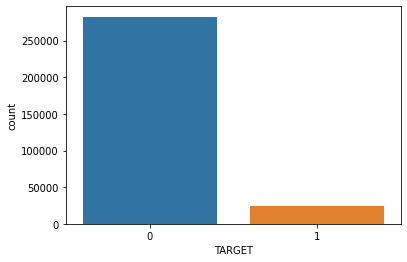

In [ ]:
# Visualisasi komposisi Target

sns.countplot(train['TARGET'])

# **DATASET BUREAU**

In [ ]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [ ]:
bureau.shape

(1716428, 17)

In [ ]:
print(bureau.columns.values)

['SK_ID_CURR' 'SK_ID_BUREAU' 'CREDIT_ACTIVE' 'CREDIT_CURRENCY'
 'DAYS_CREDIT' 'CREDIT_DAY_OVERDUE' 'DAYS_CREDIT_ENDDATE'
 'DAYS_ENDDATE_FACT' 'AMT_CREDIT_MAX_OVERDUE' 'CNT_CREDIT_PROLONG'
 'AMT_CREDIT_SUM' 'AMT_CREDIT_SUM_DEBT' 'AMT_CREDIT_SUM_LIMIT'
 'AMT_CREDIT_SUM_OVERDUE' 'CREDIT_TYPE' 'DAYS_CREDIT_UPDATE' 'AMT_ANNUITY']


In [ ]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [ ]:
bureau.isnull().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

In [ ]:
# differentiate numerical and categorical columns (bureau)

numerical_features = bureau.select_dtypes(include = "number").columns.tolist() # numerical variable
categorical_features = bureau.select_dtypes(include = "object").columns.tolist() # categorical variable

print("numerical_features: ", numerical_features)
print("categorical_features : ", categorical_features)

numerical_features:  ['SK_ID_CURR', 'SK_ID_BUREAU', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY']
categorical_features :  ['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE']


In [ ]:
# data description (bureau)
bureau[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,1716428.0,2.782149e+05,1.029386e+05,100001.000,188866.75,278055.0,367426.00,4.562550e+05
SK_ID_BUREAU,1716428.0,5.924434e+06,5.322657e+05,5000000.000,5463953.75,5926303.5,6385681.25,6.843457e+06
DAYS_CREDIT,1716428.0,-1.142108e+03,7.951649e+02,-2922.000,-1666.00,-987.0,-474.00,0.000000e+00
CREDIT_DAY_OVERDUE,1716428.0,8.181666e-01,3.654443e+01,0.000,0.00,0.0,0.00,2.792000e+03
DAYS_CREDIT_ENDDATE,1610875.0,5.105174e+02,4.994220e+03,-42060.000,-1138.00,-330.0,474.00,3.119900e+04
DAYS_ENDDATE_FACT,1082775.0,-1.017437e+03,7.140106e+02,-42023.000,-1489.00,-897.0,-425.00,0.000000e+00
AMT_CREDIT_MAX_OVERDUE,591940.0,3.825418e+03,2.060316e+05,0.000,0.00,0.0,0.00,1.159872e+08
CNT_CREDIT_PROLONG,1716428.0,6.410406e-03,9.622391e-02,0.000,0.00,0.0,0.00,9.000000e+00
AMT_CREDIT_SUM,1716415.0,3.549946e+05,1.149811e+06,0.000,51300.00,125518.5,315000.00,5.850000e+08
AMT_CREDIT_SUM_DEBT,1458759.0,1.370851e+05,6.774011e+05,-4705600.320,0.00,0.0,40153.50,1.701000e+08


In [ ]:
# data description (bureau)
bureau[categorical_features].describe().T

,count,unique,top,freq
CREDIT_ACTIVE,1716428,4,Closed,1079273
CREDIT_CURRENCY,1716428,4,currency 1,1715020
CREDIT_TYPE,1716428,15,Consumer credit,1251615


In [ ]:
# Cek Duplikat (bureau)
bureau[bureau.duplicated()] 

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY


# **DATA PREPARATION**

In [ ]:
import pandas as pd
import numpy as np

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/application_train.csv', header=0,sep=',')

In [ ]:
features = [
    'SK_ID_CURR',
    'TARGET',
    'NAME_CONTRACT_TYPE',
    'CODE_GENDER',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'CNT_CHILDREN',
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_GOODS_PRICE',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE',
    'DAYS_BIRTH',
    'DAYS_EMPLOYED',
    'CNT_FAM_MEMBERS'
]

reduced_train = train[features]
reduced_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,Working,Secondary / secondary special,-9461,-637,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,State servant,Higher education,-16765,-1188,2.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,Working,Secondary / secondary special,-19046,-225,1.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,Working,Secondary / secondary special,-19005,-3039,2.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,Working,Secondary / secondary special,-19932,-3038,1.0


In [ ]:
reduced_train.shape

(307511, 15)

In [ ]:
reduced_train.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.0,189145.5,278202.0,367142.5,456255.0
TARGET,307511.0,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.0,270000.0,513531.0,808650.0,4050000.0
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,40500.0,238500.0,450000.0,679500.0,4050000.0
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-25229.0,-19682.0,-15750.0,-12413.0,-7489.0
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-17912.0,-2760.0,-1213.0,-289.0,365243.0
CNT_FAM_MEMBERS,307509.0,2.152665,0.910682,1.0,2.0,2.0,3.0,20.0


In [ ]:
# missing value checking
reduced_train.isnull().sum()

SK_ID_CURR               0
TARGET                   0
NAME_CONTRACT_TYPE       0
CODE_GENDER              0
FLAG_OWN_CAR             0
FLAG_OWN_REALTY          0
CNT_CHILDREN             0
AMT_INCOME_TOTAL         0
AMT_CREDIT               0
AMT_GOODS_PRICE        278
NAME_INCOME_TYPE         0
NAME_EDUCATION_TYPE      0
DAYS_BIRTH               0
DAYS_EMPLOYED            0
CNT_FAM_MEMBERS          2
dtype: int64

In [ ]:
# mengisi missing values di good price dengan median

median1 = reduced_train["AMT_GOODS_PRICE"].median()
reduced_train["AMT_GOODS_PRICE"] = reduced_train["AMT_GOODS_PRICE"].replace(np.nan, median1)

<ipython-input-189-b5a722c09a99>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_train["AMT_GOODS_PRICE"] = reduced_train["AMT_GOODS_PRICE"].replace(np.nan, median1)


In [ ]:
# mengisi missing values di fam members dengan median

median2 = reduced_train["CNT_FAM_MEMBERS"].median()
reduced_train["CNT_FAM_MEMBERS"] = reduced_train["AMT_GOODS_PRICE"].replace(np.nan, median2)

<ipython-input-190-896a8de51057>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_train["CNT_FAM_MEMBERS"] = reduced_train["AMT_GOODS_PRICE"].replace(np.nan, median2)


In [ ]:
# cek missing value kembali
reduced_train.isnull().sum()

SK_ID_CURR             0
TARGET                 0
NAME_CONTRACT_TYPE     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_GOODS_PRICE        0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
CNT_FAM_MEMBERS        0
dtype: int64

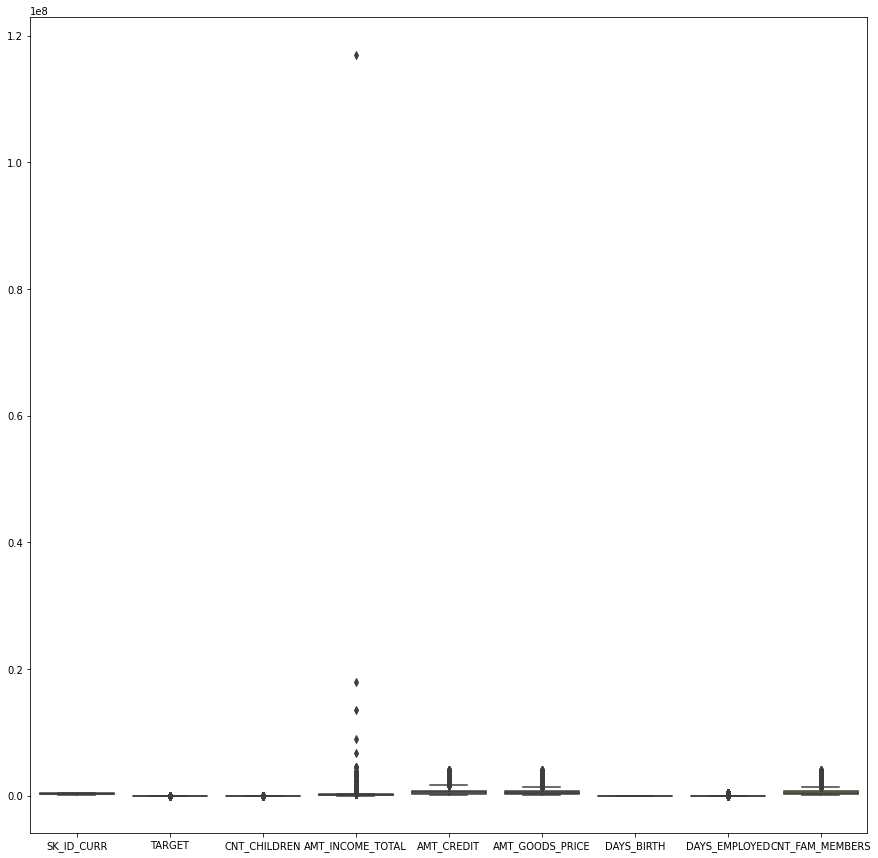

In [ ]:
#Visualisasi untuk mengecek outlier

fig, ax = plt.subplots(figsize=(15,15))
sns.boxplot(data= reduced_train)

# terdapat outlier di income total, amt credit, goods price, fam members

In [ ]:
# outlier handling ('AMT_INCOME_TOTAL')

Q1 = reduced_train['AMT_INCOME_TOTAL'].quantile(0.25)
Q3 = reduced_train['AMT_INCOME_TOTAL'].quantile(0.75)

IQR = Q3 - Q1

upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

outliers = train[(train.AMT_INCOME_TOTAL < lower) | (train.AMT_INCOME_TOTAL > upper)]
reduced_train.loc[(reduced_train['AMT_INCOME_TOTAL'] > upper, 'AMT_INCOME_TOTAL')] = upper # change outlier to upper

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
# outlier handling ('AMT_CREDIT')

Q1 = reduced_train['AMT_CREDIT'].quantile(0.25)
Q3 = reduced_train['AMT_CREDIT'].quantile(0.75)

IQR = Q3 - Q1

upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

outliers = train[(train.AMT_CREDIT < lower) | (train.AMT_CREDIT > upper)]
reduced_train.loc[(reduced_train['AMT_CREDIT'] > upper, 'AMT_CREDIT')] = upper # change outlier to upper

In [ ]:
# outlier handling ('AMT_GOODS_PRICE')

Q1 = reduced_train['AMT_GOODS_PRICE'].quantile(0.25)
Q3 = reduced_train['AMT_GOODS_PRICE'].quantile(0.75)

IQR = Q3 - Q1

upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

outliers = train[(train.AMT_GOODS_PRICE < lower) | (train.AMT_GOODS_PRICE > upper)]
reduced_train.loc[(reduced_train['AMT_GOODS_PRICE'] > upper, 'AMT_GOODS_PRICE')] = upper # change outlier to upper

In [ ]:
# outlier handling ('CNT_FAM_MEMBERS')

Q1 = reduced_train['CNT_FAM_MEMBERS'].quantile(0.25)
Q3 = reduced_train['CNT_FAM_MEMBERS'].quantile(0.75)

IQR = Q3 - Q1

upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

outliers = train[(train.CNT_FAM_MEMBERS < lower) | (train.CNT_FAM_MEMBERS > upper)]
reduced_train.loc[(reduced_train['CNT_FAM_MEMBERS'] > upper, 'CNT_FAM_MEMBERS')] = upper # change outlier to upper

In [ ]:
# outlier handling ('DAYS_EMPLOYED')

Q1 = reduced_train['DAYS_EMPLOYED'].quantile(0.25)
Q3 = reduced_train['DAYS_EMPLOYED'].quantile(0.75)

IQR = Q3 - Q1

upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

outliers = train[(train.DAYS_EMPLOYED < lower) | (train.DAYS_EMPLOYED > upper)]
reduced_train.loc[(reduced_train['DAYS_EMPLOYED'] > upper, 'DAYS_EMPLOYED')] = upper # change outlier to upper
reduced_train.loc[(reduced_train['DAYS_EMPLOYED'] < lower, 'DAYS_EMPLOYED')] = lower # change outlier to lower

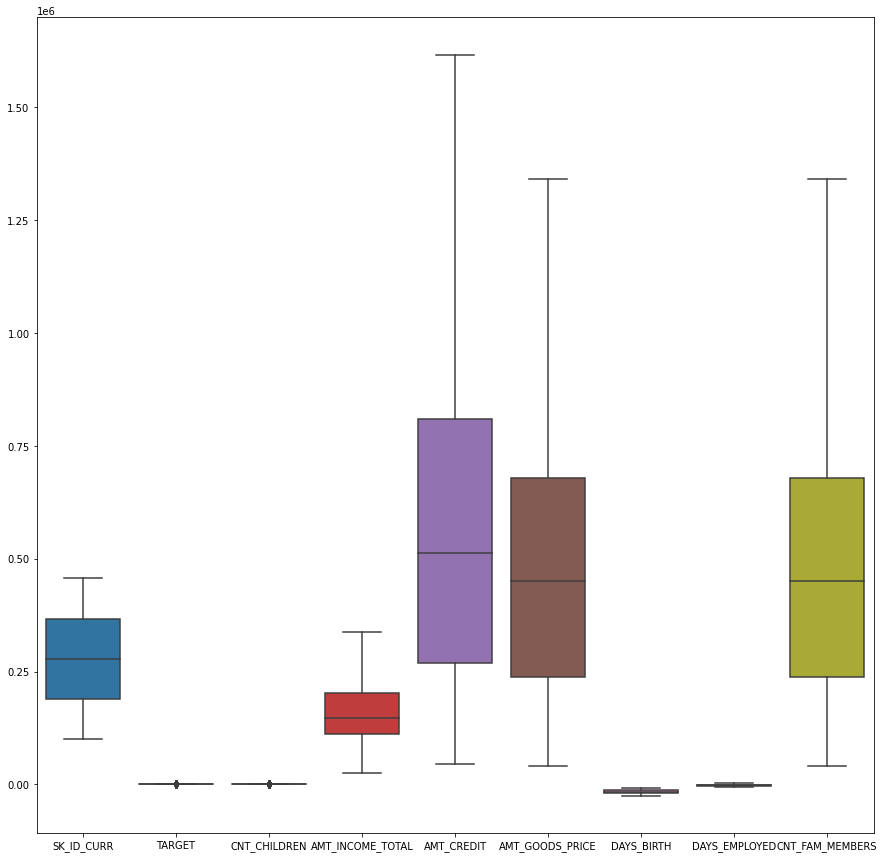

In [ ]:
#Visualisasi untuk mengecek kembali outlier

fig, ax = plt.subplots(figsize=(15,15))
sns.boxplot(data= reduced_train)

In [ ]:
feature_bureau = [
    'SK_ID_CURR', 
    'DAYS_CREDIT_ENDDATE',
    'AMT_CREDIT_SUM', 
    'AMT_CREDIT_SUM_DEBT',
]

reduced_bureau = bureau[feature_bureau]
reduced_bureau.head()

,SK_ID_CURR,DAYS_CREDIT_ENDDATE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT
0,215354,-153.0,91323.0,0.0
1,215354,1075.0,225000.0,171342.0
2,215354,528.0,464323.5,NaN
3,215354,NaN,90000.0,NaN
4,215354,1197.0,2700000.0,NaN


In [ ]:
reduced_bureau.shape

(1716428, 4)

In [ ]:
reduced_bureau.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,1716428.0,278214.933645,1.029386e+05,100001.00,188866.75,278055.0,367426.0,456255.0
DAYS_CREDIT_ENDDATE,1610875.0,510.517362,4.994220e+03,-42060.00,-1138.00,-330.0,474.0,31199.0
AMT_CREDIT_SUM,1716415.0,354994.591918,1.149811e+06,0.00,51300.00,125518.5,315000.0,585000000.0
AMT_CREDIT_SUM_DEBT,1458759.0,137085.119952,6.774011e+05,-4705600.32,0.00,0.0,40153.5,170100000.0


In [ ]:
# missing value checking
reduced_bureau.isnull().sum()

SK_ID_CURR                  0
DAYS_CREDIT_ENDDATE    105553
AMT_CREDIT_SUM             13
AMT_CREDIT_SUM_DEBT    257669
dtype: int64

In [ ]:
## check missing values percentage
def missing_data(reduced_bureau):
    total = reduced_bureau.isnull().sum().sort_values(ascending = False)
    percent = (reduced_bureau.isnull().sum()/reduced_bureau.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

## columns that contains more than 60% missing values    
record = missing_data(reduced_bureau) 

df = pd.DataFrame(record,
                  columns = ["Total", "Percent"])

print (df)

                      Total    Percent
AMT_CREDIT_SUM_DEBT  257669  15.011932
DAYS_CREDIT_ENDDATE  105553   6.149573
AMT_CREDIT_SUM           13   0.000757
SK_ID_CURR                0   0.000000


In [ ]:
median1 = reduced_train["AMT_GOODS_PRICE"].median()
reduced_train["AMT_GOODS_PRICE"] = reduced_train["AMT_GOODS_PRICE"].replace(np.nan, median1)

<ipython-input-204-f8397a0aeb5a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_train["AMT_GOODS_PRICE"] = reduced_train["AMT_GOODS_PRICE"].replace(np.nan, median1)


In [ ]:
#Missing Value Handling

# mengisi missing values di "DAYS_CREDIT_ENDDATE" dengan median

median2 = reduced_bureau["DAYS_CREDIT_ENDDATE"].median()
reduced_bureau["DAYS_CREDIT_ENDDATE"] = reduced_bureau["DAYS_CREDIT_ENDDATE"].replace(np.nan, median2)

<ipython-input-205-fcd8bc87ce74>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_bureau["DAYS_CREDIT_ENDDATE"] = reduced_bureau["DAYS_CREDIT_ENDDATE"].replace(np.nan, median2)


In [ ]:
#Missing Value Handling

# mengisi missing values di AMT_CREDIT_SUM_DEBT dengan median

median3 = reduced_bureau["AMT_CREDIT_SUM_DEBT"].median()
reduced_bureau["AMT_CREDIT_SUM_DEBT"] = reduced_bureau["AMT_CREDIT_SUM_DEBT"].replace(np.nan, median3)

<ipython-input-206-130d4d8b715f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_bureau["AMT_CREDIT_SUM_DEBT"] = reduced_bureau["AMT_CREDIT_SUM_DEBT"].replace(np.nan, median3)


In [ ]:
#Missing Value Handling

# mengisi missing values di "AMT_CREDIT_SUM" dengan median

median4 = reduced_bureau["AMT_CREDIT_SUM"].median()
reduced_bureau["AMT_CREDIT_SUM"] = reduced_bureau["AMT_CREDIT_SUM"].replace(np.nan, median4)

<ipython-input-207-9d2465a823a7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_bureau["AMT_CREDIT_SUM"] = reduced_bureau["AMT_CREDIT_SUM"].replace(np.nan, median4)


In [ ]:
# missing value checking
reduced_bureau.isnull().sum()

SK_ID_CURR             0
DAYS_CREDIT_ENDDATE    0
AMT_CREDIT_SUM         0
AMT_CREDIT_SUM_DEBT    0
dtype: int64

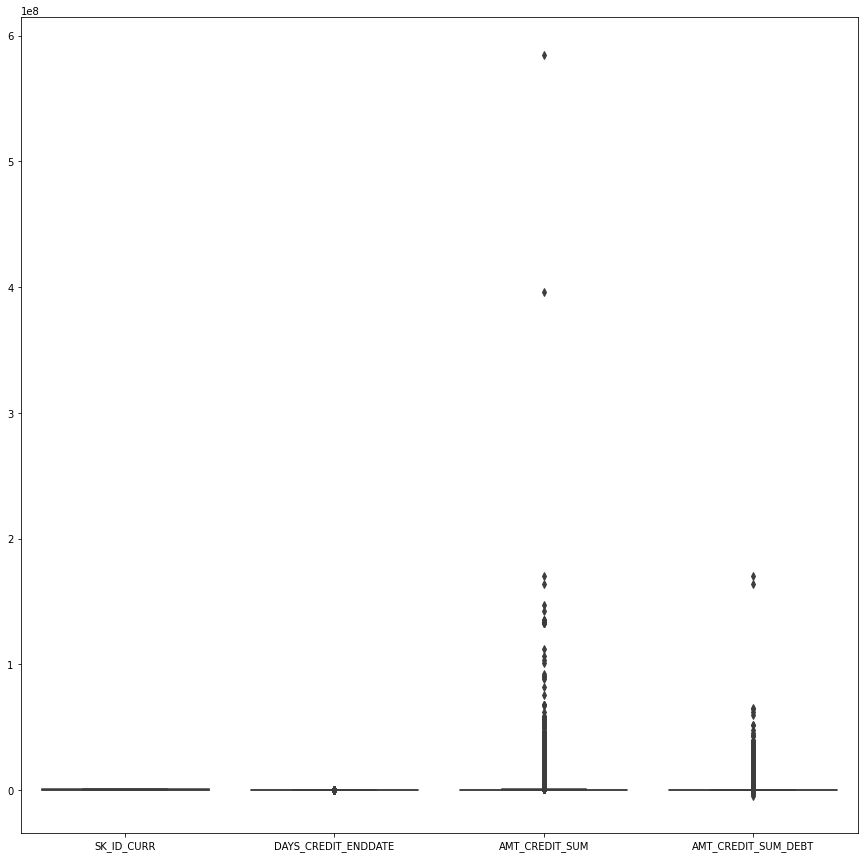

In [ ]:
#Visualisasi untuk mengecek outlier

fig, ax = plt.subplots(figsize=(15,15))
sns.boxplot(data= reduced_bureau)

In [ ]:
# outlier handling ('AMT_CREDIT_SUM ')

Q1 = reduced_bureau['AMT_CREDIT_SUM'].quantile(0.25)
Q3 = reduced_bureau['AMT_CREDIT_SUM'].quantile(0.75)

IQR = Q3 - Q1

upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

outliers = reduced_bureau[(reduced_bureau.AMT_CREDIT_SUM  < lower) | (reduced_bureau.AMT_CREDIT_SUM  > upper)]
reduced_bureau.loc[(reduced_bureau['AMT_CREDIT_SUM'] > upper, 'AMT_CREDIT_SUM')] = upper # change outlier to upper

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
# outlier handling ('AMT_CREDIT_SUM_DEBT')

Q1 = reduced_bureau['AMT_CREDIT_SUM_DEBT'].quantile(0.25)
Q3 = reduced_bureau['AMT_CREDIT_SUM_DEBT'].quantile(0.75)

IQR = Q3 - Q1

upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

outliers = reduced_bureau[(reduced_bureau.AMT_CREDIT_SUM_DEBT  < lower) | (reduced_bureau.AMT_CREDIT_SUM_DEBT  > upper)]
reduced_bureau.loc[(reduced_bureau['AMT_CREDIT_SUM_DEBT'] > upper, 'AMT_CREDIT_SUM_DEBT')] = upper # change outlier to upper
reduced_bureau.loc[(reduced_bureau['AMT_CREDIT_SUM_DEBT'] < lower, 'AMT_CREDIT_SUM_DEBT')] = lower # change outlier to lower

In [ ]:
# outlier handling ('DAYS_CREDIT_ENDDATE')

Q1 = reduced_bureau['DAYS_CREDIT_ENDDATE'].quantile(0.25)
Q3 = reduced_bureau['DAYS_CREDIT_ENDDATE'].quantile(0.75)

IQR = Q3 - Q1

upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

outliers = reduced_bureau[(reduced_bureau.DAYS_CREDIT_ENDDATE < lower) | (reduced_bureau.DAYS_CREDIT_ENDDATE > upper)]
reduced_bureau.loc[(reduced_bureau['DAYS_CREDIT_ENDDATE'] > upper, 'DAYS_CREDIT_ENDDATE')] = upper # change outlier to upper
reduced_bureau.loc[(reduced_bureau['DAYS_CREDIT_ENDDATE'] < lower, 'DAYS_CREDIT_ENDDATE')] = lower # change outlier to lower

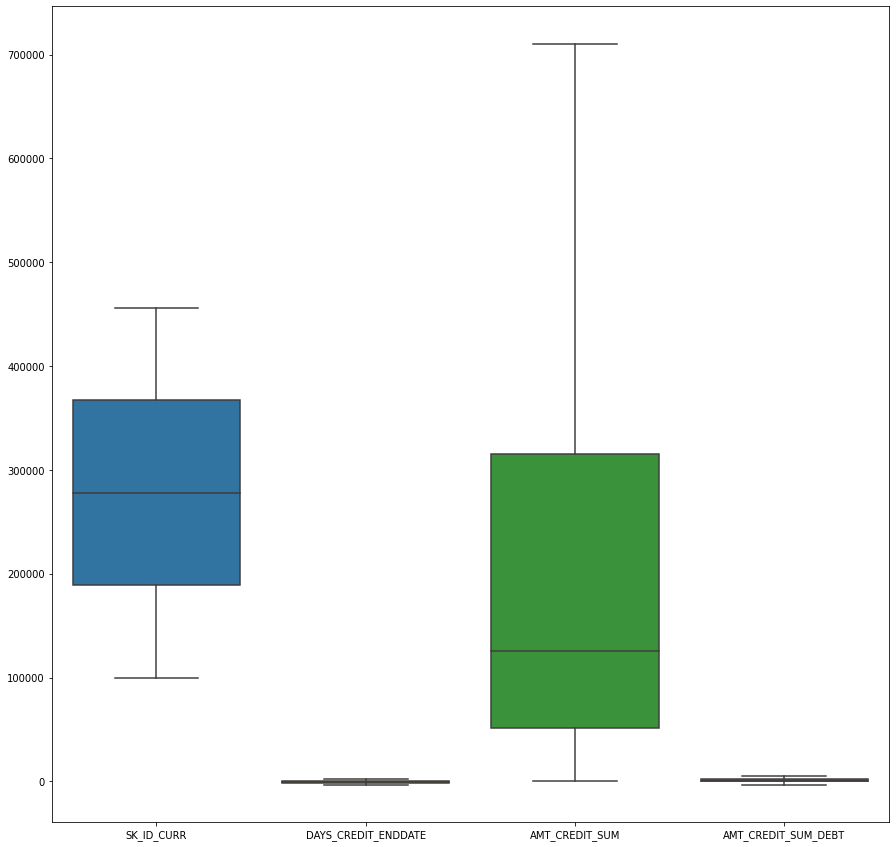

In [ ]:
#Visualisasi untuk mengecek outlier

fig, ax = plt.subplots(figsize=(15,15))
sns.boxplot(data= reduced_bureau)

# **JOIN APP TRAIN - BUREAU**

In [ ]:
used = reduced_train.join(reduced_bureau, on='SK_ID_CURR', how='left', lsuffix='_left', rsuffix='_right')
display(used)

,SK_ID_CURR_left,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,SK_ID_CURR_right,DAYS_CREDIT_ENDDATE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,Working,Secondary / secondary special,-9461,-637.0,351000.0,164968,-2292.0,58590.99,0.00
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,State servant,Higher education,-16765,-1188.0,1129500.0,164968,-992.0,91881.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,Working,Secondary / secondary special,-19046,-225.0,135000.0,164968,-1181.0,183829.50,0.00
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,Working,Secondary / secondary special,-19005,-3039.0,297000.0,164968,-1482.0,45153.00,0.00
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,Working,Secondary / secondary special,-19932,-3038.0,513000.0,164968,-1708.0,699943.50,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,225000.0,Working,Secondary / secondary special,-9327,-236.0,225000.0,348424,-828.0,49500.00,0.00
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,225000.0,Pensioner,Secondary / secondary special,-20775,3417.5,225000.0,348424,-330.0,450000.00,4938.75
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,585000.0,Working,Higher education,-14966,-6466.5,585000.0,348424,-828.0,49500.00,0.00
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,319500.0,Commercial associate,Secondary / secondary special,-11961,-4786.0,319500.0,356904,979.0,710550.00,4938.75


In [ ]:
used = used.drop(['SK_ID_CURR_left','SK_ID_CURR_right'], 1)

<ipython-input-215-395265e1ddd1>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  used = used.drop(['SK_ID_CURR_left','SK_ID_CURR_right'], 1)


In [ ]:
used.shape

(307511, 17)

In [ ]:
used.dtypes

TARGET                   int64
NAME_CONTRACT_TYPE      object
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
AMT_CREDIT             float64
AMT_GOODS_PRICE        float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
DAYS_BIRTH               int64
DAYS_EMPLOYED          float64
CNT_FAM_MEMBERS        float64
DAYS_CREDIT_ENDDATE    float64
AMT_CREDIT_SUM         float64
AMT_CREDIT_SUM_DEBT    float64
dtype: object

In [ ]:
used['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


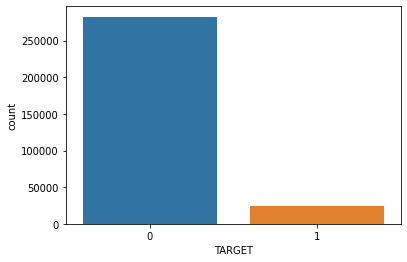

In [ ]:
# Visualisasi komposisi Target

sns.countplot(used['TARGET'])

In [ ]:
# Resampling

from sklearn.utils import resample

#crate two different dataframe of majority and minority class
df_majority = used[(used['TARGET']==0)]
df_minority = used[(used['TARGET']==1)]

#upsample minority class
df_minority_upsampled = resample(df_minority, replace=True, n_samples=282686, random_state=42)

#combine majority class with upsampled minority class
used_upsampled = pd.concat([df_minority_upsampled, df_majority])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


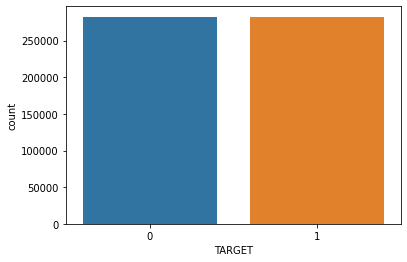

In [ ]:
# Visualisasi komposisi Target

sns.countplot(used_upsampled['TARGET'])

In [ ]:
# one hot encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

used_upsampled['NAME_CONTRACT_TYPE']=le.fit_transform(used_upsampled['NAME_CONTRACT_TYPE'])
used_upsampled['CODE_GENDER']=le.fit_transform(used_upsampled['CODE_GENDER'])
used_upsampled['FLAG_OWN_CAR']=le.fit_transform(used_upsampled['FLAG_OWN_CAR'])
used_upsampled['FLAG_OWN_REALTY']=le.fit_transform(used_upsampled['FLAG_OWN_REALTY'])
used_upsampled['CNT_CHILDREN']=le.fit_transform(used_upsampled['CNT_CHILDREN'])
used_upsampled['AMT_INCOME_TOTAL']=le.fit_transform(used_upsampled['AMT_INCOME_TOTAL'])
used_upsampled['AMT_CREDIT']=le.fit_transform(used_upsampled['AMT_CREDIT'])
used_upsampled['AMT_GOODS_PRICE']=le.fit_transform(used_upsampled['AMT_GOODS_PRICE'])
used_upsampled['DAYS_BIRTH']=le.fit_transform(used_upsampled['DAYS_BIRTH'])
used_upsampled['DAYS_EMPLOYED']=le.fit_transform(used_upsampled['DAYS_EMPLOYED'])
used_upsampled['CNT_FAM_MEMBERS']=le.fit_transform(used_upsampled['CNT_FAM_MEMBERS'])
used_upsampled['DAYS_CREDIT_ENDDATE']=le.fit_transform(used_upsampled['DAYS_CREDIT_ENDDATE'])
used_upsampled['AMT_CREDIT_SUM']=le.fit_transform(used_upsampled['AMT_CREDIT_SUM'])
used_upsampled['AMT_CREDIT_SUM_DEBT']=le.fit_transform(used_upsampled['AMT_CREDIT_SUM_DEBT'])
used_upsampled['NAME_EDUCATION_TYPE']=le.fit_transform(used_upsampled['NAME_EDUCATION_TYPE'])
used_upsampled['NAME_INCOME_TYPE']=le.fit_transform(used_upsampled['NAME_INCOME_TYPE'])

In [ ]:
used_upsampled

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,DAYS_CREDIT_ENDDATE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT
292662,1,0,0,1,1,0,853,477,46,7,4,8120,4861,46,2482,30313,952
194394,1,0,0,0,0,1,719,1362,289,7,4,13327,5937,289,2491,31017,1819
11104,1,0,0,0,0,1,2064,4081,636,1,4,15727,5485,636,2834,24704,952
66953,1,0,1,1,1,2,2064,1666,289,7,4,12906,2252,289,3086,23604,952
266717,1,0,0,0,1,0,1872,1381,294,7,1,14064,5875,294,5225,53486,1819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307505,0,0,0,0,1,0,904,512,80,3,4,764,6467,80,4398,64181,1819
307506,0,0,1,0,0,0,1407,612,80,7,4,15818,6230,80,1993,16746,952
307507,0,0,0,0,1,0,387,672,80,3,4,4372,6467,80,2491,60787,1819
307508,0,0,0,0,1,0,1371,2270,403,7,1,10179,0,403,1993,16746,952


# **MODELLING**

In [ ]:
#Check Data Type Akhir

used_upsampled.dtypes

TARGET                 int64
NAME_CONTRACT_TYPE     int64
CODE_GENDER            int64
FLAG_OWN_CAR           int64
FLAG_OWN_REALTY        int64
CNT_CHILDREN           int64
AMT_INCOME_TOTAL       int64
AMT_CREDIT             int64
AMT_GOODS_PRICE        int64
NAME_INCOME_TYPE       int64
NAME_EDUCATION_TYPE    int64
DAYS_BIRTH             int64
DAYS_EMPLOYED          int64
CNT_FAM_MEMBERS        int64
DAYS_CREDIT_ENDDATE    int64
AMT_CREDIT_SUM         int64
AMT_CREDIT_SUM_DEBT    int64
dtype: object

In [ ]:
# Membagi data menjadi train set dan tes set

Data = used_upsampled.drop(['TARGET'], 1)
Target = used_upsampled[['TARGET']]

from sklearn.model_selection import train_test_split

x = Data
y = Target

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state=0) # test set = 20%, train set = 80%

<ipython-input-225-c60ea27be701>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  Data = used_upsampled.drop(['TARGET'], 1)


In [ ]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
rf=RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1, max_depth=5, oob_score=True)
rf.fit(train_x,train_y)

<ipython-input-227-e4a1d1c465e1>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_x,train_y)


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=0)

In [ ]:
pred_test_y=rf.predict(test_x)
pred_test_y

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
# Decision Tree

from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn.ensemble import BaggingClassifier

In [ ]:
dtree = tree.DecisionTreeClassifier()

In [ ]:
# Buat objek Bagging Classifier
bc = BaggingClassifier(base_estimator=dtree, n_estimators=100)

In [ ]:
# Latih model dengan data train
bc.fit(x, y)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [ ]:
predictions_dt = bc.predict(test_x)
predictions_dt

array([1, 1, 1, ..., 1, 1, 1])

# **EVALUATION**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# **Random Forest Evaluation**

In [ ]:
#Accuracy score
accuracy_score(test_y, pred_test_y)

0.6162104797700642

In [ ]:
# Precision score
precision_score(test_y, pred_test_y, average='macro')

0.6162434098535798

In [ ]:
# recall score 
recall_score(test_y, pred_test_y, average='macro')

0.6162335489778253

In [ ]:
# View confusion matrix for test data and predictions
confusion_matrix(test_y, pred_test_y)

array([[34671, 22102],
       [21295, 35007]])

In [ ]:
# View the classification report for test data and predictions
print(classification_report(test_y, pred_test_y))

              precision    recall  f1-score   support

           0       0.62      0.61      0.62     56773
           1       0.61      0.62      0.62     56302

    accuracy                           0.62    113075
   macro avg       0.62      0.62      0.62    113075
weighted avg       0.62      0.62      0.62    113075



In [ ]:
#ROC

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(test_y, pred_test_y, pos_label=1) # pos_label: positive label
auc(fpr, tpr)

0.6162335489778253

In [ ]:
#AUC

from sklearn.metrics import roc_auc_score

predictions = rf.predict_proba(test_x)[:,1]
auc = roc_auc_score(test_y, predictions)

print(auc)

0.658065455932537


# **Decision Tree Evaluation**

In [ ]:
#Accuracy score
accuracy_score(test_y, predictions_dt)

1.0

In [ ]:
# Precision score
precision_score(test_y, predictions_dt, average='macro')

1.0

In [ ]:
# recall score 
recall_score(test_y, predictions_dt, average='macro')

1.0

In [ ]:
# View confusion matrix for test data and predictions
confusion_matrix(test_y, predictions_dt)

array([[56773,     0],
       [    0, 56302]])

In [ ]:
# View the classification report for test data and predictions
print(classification_report(test_y, predictions_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56773
           1       1.00      1.00      1.00     56302

    accuracy                           1.00    113075
   macro avg       1.00      1.00      1.00    113075
weighted avg       1.00      1.00      1.00    113075



In [ ]:
#AUC

from sklearn.metrics import roc_auc_score

predictions = bc.predict_proba(test_x)[:,1]
auc = roc_auc_score(test_y, predictions)

print(auc)

1.0
